In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df_cns = pd.read_csv('../../Data/Downloaded_Old/pre_cns.csv')
df_emp = pd.read_csv('../../Data/Downloaded_Old/pre_emp.csv')
df_cap = pd.read_csv('../../Data/Downloaded_Old/pre_cap.csv')
df_GDP = pd.read_csv('../../Data/Downloaded_OLd/pre_GDP.csv')

In [7]:
# parameters
α_KA  = 0.15
α_LA  = 0.55
α_KM  = 0.6
α_LM  = 0.4
η     = 0.15
γ_pre = 60
#γ_post = 76.4
γ_post = 68.8 
δ     = 0.05
β     = 0.96

In [16]:
# create the ratio of marginal utility
df_cns['cA-γ/cM'] = (df_cns['food_cns'] - γ_pre) / df_cns['non_food_cns']
df_cns['mu_M/mu_A'] = (1-η) / η * df_cns['cA-γ/cM']

In [17]:
df_GDP_cap = pd.merge(df_GDP, df_cap, on = 'year_wst')

In [18]:
df_GDP_cap_picked = df_GDP_cap[['year_wst', 'prm_GDP', 'non_prm_GDP', 'prm_cap', 'non_prm_cap']]

In [19]:
df_GDP_cap_picked['F_KA'] = α_KA * df_GDP_cap_picked['prm_GDP'] / df_GDP_cap_picked['prm_cap'] 

In [20]:
df_GDP_cap_picked['F_KM'] = α_KM * df_GDP_cap_picked['non_prm_GDP'] / df_GDP_cap_picked['non_prm_cap'] 

In [21]:
df_GDP_cap_picked['F_KM/F_KA'] = df_GDP_cap_picked['F_KM'] / df_GDP_cap_picked['F_KA']

In [22]:
df_merged = pd.merge(df_GDP_cap_picked, 
                    df_cns[['year_wst', 'mu_M/mu_A']], on = 'year_wst')

In [23]:
df_merged['norm_cap_wedge'] = df_merged['mu_M/mu_A'] * df_merged['F_KM/F_KA']

In [24]:
df_merged['norm_cap_wedge-1'] = df_merged['norm_cap_wedge'] - 1

<AxesSubplot:xlabel='year_wst'>

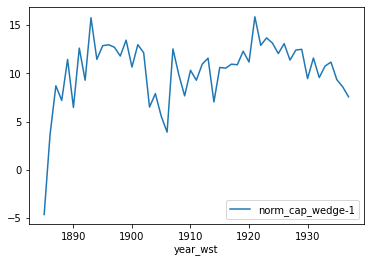

In [25]:
fig, ax = plt.subplots()
df_merged.plot(x = 'year_wst', y = 'norm_cap_wedge-1', ax = ax)

In [26]:
df_merged.to_csv('../../Data/Results/pre_cap_w.csv', index = False)

In [28]:
df_merged.loc[35:]['norm_cap_wedge-1'].mean()

11.454172570331822

In [30]:
df_merged['YM/YA'] = df_merged['non_prm_GDP']/df_merged['prm_GDP']

In [31]:
df_merged['KM/KA'] = df_merged['non_prm_cap']/df_merged['prm_cap']

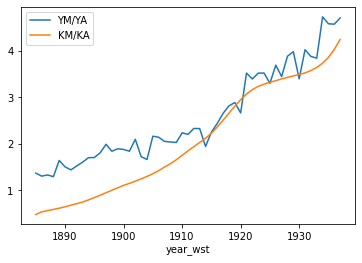

In [32]:
fig, ax = plt.subplots()
df_merged.plot(x = 'year_wst', y = 'YM/YA', ax = ax)
df_merged.plot(x = 'year_wst', y = 'KM/KA', ax = ax)
plt.legend()

In [33]:
df_merged.to_csv('../../Data/Results/pre_cap_w_test.csv', index = False)